100%|██████████| 9.91M/9.91M [00:00<00:00, 42.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.14MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.00MB/s]


Epoch [1/2], Loss: 0.1030
Epoch [2/2], Loss: 0.0962
Test Accuracy: 96.93%

Correct and Incorrect Predictions Visualization:


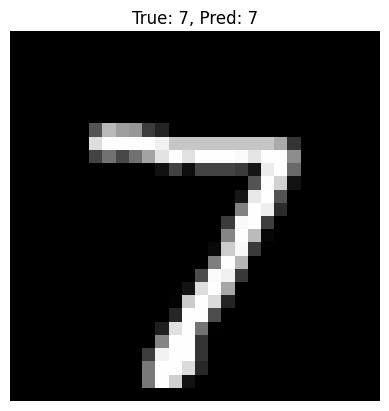

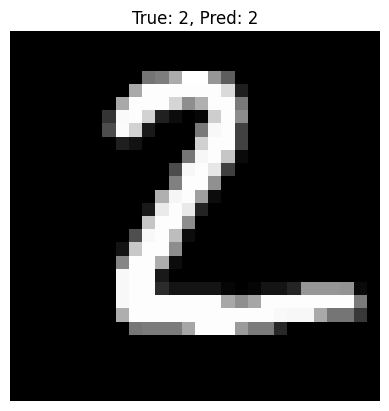

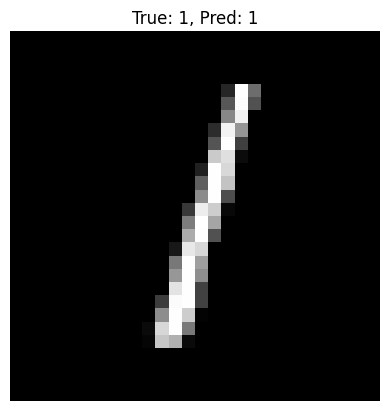

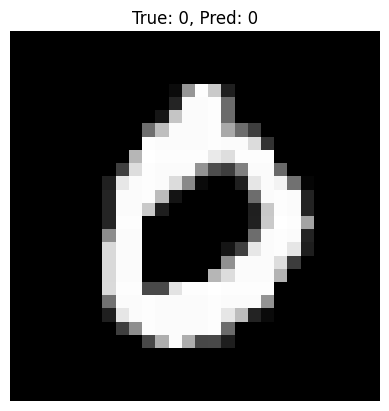

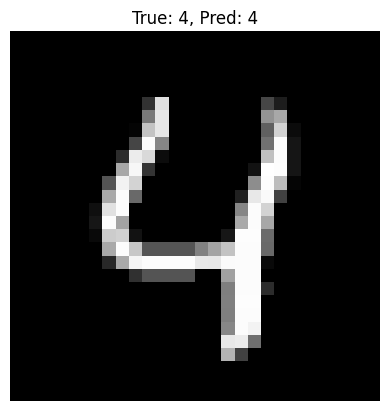

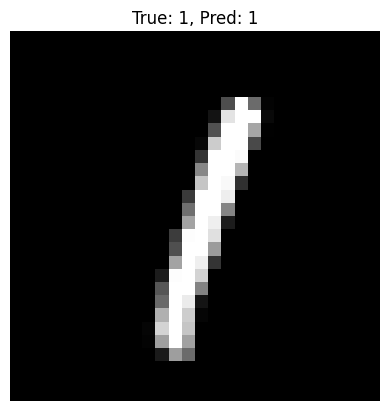

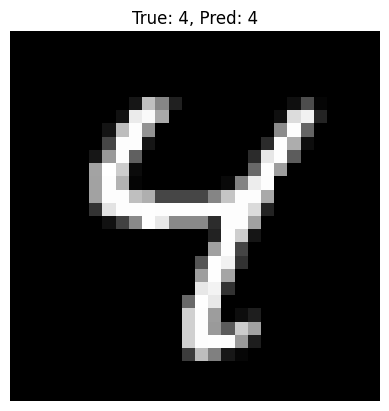

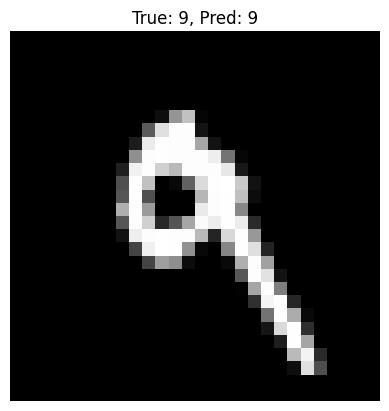

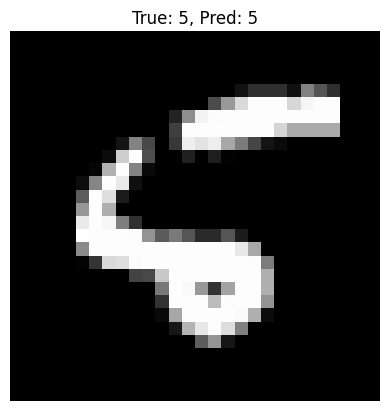

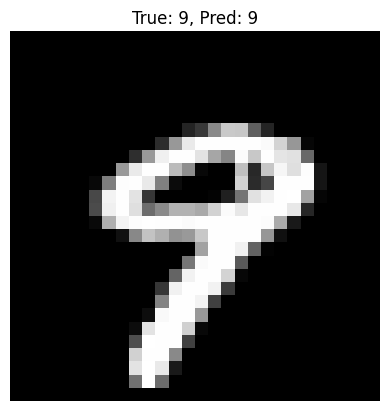

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = NeuralNet()


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


def visualize_predictions(loader, model, num_images=10):
    model.eval()
    images_shown = 0

    for images, labels in loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(images)):
            if images_shown >= num_images:
                return
            plt.imshow(images[i][0], cmap='gray')
            plt.title(f"True: {labels[i]}, Pred: {predicted[i]}")
            plt.axis('off')
            plt.show()
            images_shown += 1

print("\nCorrect and Incorrect Predictions Visualization:")
visualize_predictions(test_loader, model, num_images=10)
